# Default scipy optimization

Overview:

1. Start with a specific set of kinematic variables.  
2. Pick random starting points for CFFs
3. Compute TotalUUXS function for each phi in the kinematic set (using current CFFs) to produce Fs
4. Compare resulting Fs to sampled Fs and compute mean-squared error
5. Update CFFs in a direction that reduces that mean-squared error
6. Repeat steps 3-5 until CFFs stop changing

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import scipy.optimize as optimization

from BHDVCStf import BHDVCS #modified bhdvcs file
import utilities as uts

## Setup

In [4]:
bhdvcs = BHDVCS()

df = pd.read_csv("dvcs_xs_newsets_genCFFs.csv")
data = uts.DvcsData(df)

numSets = 15
numReplicas = 500

## Produce Results

In [7]:
def produceResults(data, numSets, numReplicas):
    '''
    :param data: data of class DvcsData (which can be found in utilities.py)
    :param numSets: number of different kinematic sets contained in data
    :param numReplicas: number of replicas you would like to produce
    
    :returns: numpy array with shape (numSets, numReplicas, numCFFs)
    '''
    results = []
    for i in tqdm(range(numSets)):
        replicas = []
        seti = data.getSet(i)
        X = np.array(seti.XnoCFF)
        sigma = seti.erry
        pars = np.array([1, 1, 1])
        for i in range(numReplicas):
            y = seti.sampleY()
            cff, cffcov = optimization.curve_fit(bhdvcs.TotalUUXS, X, y, pars, sigma, method='lm')
            replicas.append(cff)
        results.append(replicas)
    return np.array(results)

In [6]:
results = produceResults(data, numSets, numReplicas)

# ReH

In [57]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 0)

Mean percent error:  9.712943065782811
RMSE:  0.968541733183946
RMSE w yhat=mean:  2.5254628436780107
R-squared:  0.8529196310079259


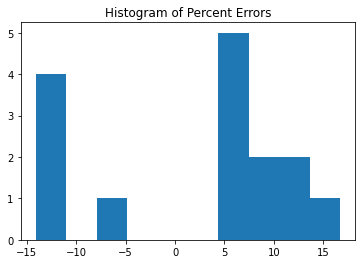

In [59]:
uts.evaluate(y_yhat)

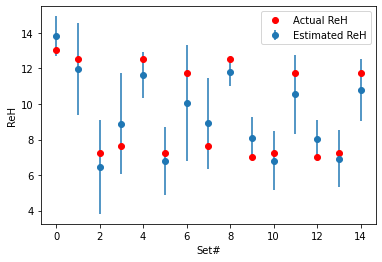

In [60]:
uts.plotError(y_yhat, err, "ReH")

# ReE

Mean percent error:  10.345105520594332
RMSE:  5.381387135502033
RMSE w yhat=mean:  2.525480507907797
R-squared:  -3.5404660277478186


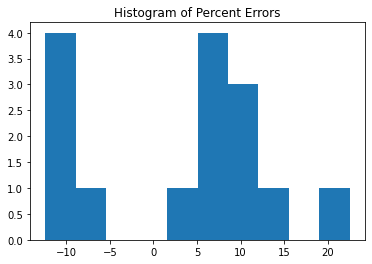

In [61]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 1)
uts.evaluate(y_yhat)

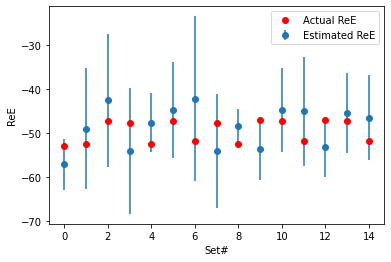

In [63]:
uts.plotError(y_yhat, err, "ReE")

# ReHtilde

Mean percent error:  8.496868542708626
RMSE:  0.44770167537808503
RMSE w yhat=mean:  1.4030345621243816
R-squared:  0.8981782164155753


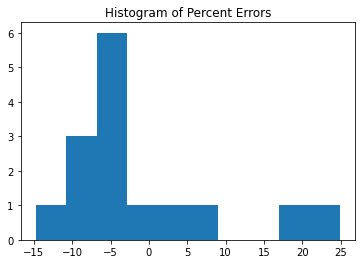

In [64]:
y_yhat, err = uts.y_yhat_errCFFs(data, results, 2)
uts.evaluate(y_yhat)

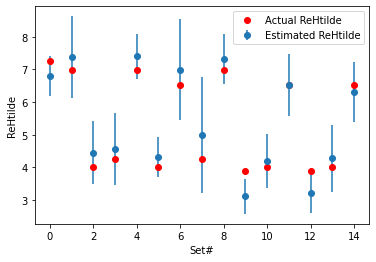

In [65]:
uts.plotError(y_yhat, err, "ReHtilde")

# Propagated Fs at 180

Mean percent error:  5.608637552822791
RMSE:  0.002524401707858882
RMSE w yhat=mean:  0.015855649879790133
R-squared:  0.9746517001349783


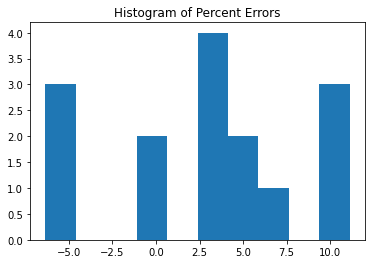

In [69]:
y_yhat, err = uts.y_yhat_errFs(results, data)
uts.evaluate(y_yhat)

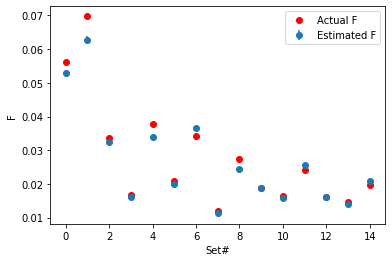

In [70]:
uts.plotError(y_yhat, err, "F")

# Save Results to file for later use

In [72]:
results.tofile('replicas500.txt')